# Linear Regression Model 


### What is a Linear Regression? 
It’s a statistical method that helps us model and study relationships between two variables, in this case, two financial assets.  In every linear regression model, there is an independent variable (X, Oil Prices) and a dependent variable (Y, Exxon Prices). The concern here is whether we can distinguish a deterministic and statistical relationship – does Oil prices do a good job of predicting the outcome of Exxon Mobile Stock Prices? 

### Our Regression Model 

•	As Oil Prices increase, does Exxon Mobile Stock Prices increase? 

•	Is there a relationship between the two variables? 

•	What is the best fitting line? 


#### Linear Equation 
$y = \beta_0 + \beta_1x$

* $y$ is the dependent variable

* $x$ is the independent variable

* $\beta_0$ is the intercept

* $\beta_1$ is the coefficient for x



#  I - Import Libraries & File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [2]:
df = pd.read_csv ('oil_exxon.csv', index_col = 'date')

In [3]:
df.head()

,exon_price,oil_price
date,,
3/28/2014,$97.70,$106.64
3/31/2014,$97.68,$105.95
4/1/2014,$97.73,$105.70
4/2/2014,$97.95,$103.37
4/3/2014,$97.93,$104.88


# II - Data Preparation/Cleaning 

   * Alter Data Types
   * Renaming/Converting Columns
   * Finding and dropping missing values as 



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 3/28/2014 to nan
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   exon_price  1256 non-null   object
 1   oil_price   1248 non-null   object
dtypes: object(2)
memory usage: 29.5+ KB


### Remove the dollar sign from the prices

In [5]:
df['exon_price'] = df['exon_price'].str.replace('$', '')
df['oil_price'] = df['oil_price'].str.replace('$', '')
df.head()

,exon_price,oil_price
date,,
3/28/2014,97.70,106.64
3/31/2014,97.68,105.95
4/1/2014,97.73,105.70
4/2/2014,97.95,103.37
4/3/2014,97.93,104.88


### Convert prices from strings to numeric values & timestamps & renaming 

In [6]:
df['exon_price'] = pd.to_numeric(df['exon_price'])
df['oil_price'] = pd.to_numeric(df['oil_price'])
df.index = pd.to_datetime(df.index)


df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-03-28 to NaT
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exon_price  1256 non-null   float64
 1   oil_price   1248 non-null   float64
dtypes: float64(2)
memory usage: 29.5 KB


In [7]:
col = {'exon_price':'exxon_price'}
df = df.rename(columns = col)
df

,exxon_price,oil_price
date,,
2014-03-28,97.70,106.64
2014-03-31,97.68,105.95
2014-04-01,97.73,105.70
2014-04-02,97.95,103.37
2014-04-03,97.93,104.88
...,...,...
2019-03-21,81.79,68.30
2019-03-22,80.48,66.29
2019-03-25,79.92,67.37


### Let's find missing values and drop as they don't add value to the regression 

In [8]:
df.isna().any()

exxon_price    True
oil_price      True
dtype: bool

In [9]:
nan_df = df[df.isna().any(axis = 1)]
nan_df

,exxon_price,oil_price
date,,
2015-08-31,75.24,NaN
2016-12-27,90.75,NaN
2017-12-26,83.98,NaN
2018-04-02,73.22,NaN
2018-05-07,77.74,NaN
2018-12-24,65.51,NaN
2018-12-26,68.64,NaN
2018-12-31,68.19,NaN
NaT,NaN,NaN


In [10]:
#lets drop the Null values as they don't do us well
df = df.dropna()

df.isna().any()


exxon_price    False
oil_price      False
dtype: bool

In [11]:
df

,exxon_price,oil_price
date,,
2014-03-28,97.70,106.64
2014-03-31,97.68,105.95
2014-04-01,97.73,105.70
2014-04-02,97.95,103.37
2014-04-03,97.93,104.88
...,...,...
2019-03-19,80.87,67.13
2019-03-20,81.32,68.35
2019-03-21,81.79,68.30


# III - Data Understanding 

* Assigning our X & Y variable 
* Plotting our X & Y variable 
* Correlation between the two variables?
* Looking for outliers & skewness




First Assumption - is there Linearity within our data? Yes! Let's move foward 

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


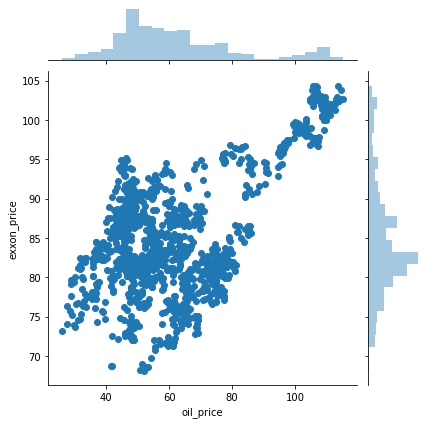

In [12]:
X = df['oil_price']
Y = df['exxon_price']


sns.jointplot(X,Y)
df.corr()
#plt.plot(X, Y)

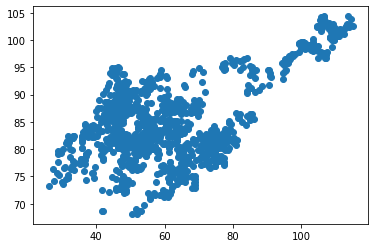

In [13]:
plt.scatter(X, Y)
plt.show()

Correlation of .6 - We have a strong relationship as the data is linear and positive 

### Measuring of skewness & outliers 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ACE2561BB0>,
      dtype=object)

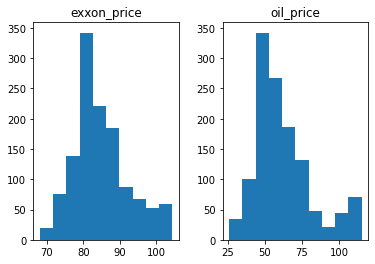

In [14]:
df.hist(grid = False)

Analyzing the histograms we notice that our data may be moderately skewed - let's run a couple metrics to really find out

Using Scipy.stats we can tell if a random sample of our data comes from a normal distruibtion 

set up - 

Ho: Data sample is from a normal distrubtion 

Ha: Data sample does not come from a normal distrubtion



In [15]:
resp = df.exxon_price

In [16]:
from scipy.stats import shapiro
shapiro(resp)[1]

7.693470392554639e-19

In [19]:
print('Exxon')
display(stats.skewtest(df['exxon_price']))
print('Oil')
display(stats.skewtest(df['oil_price']))

Exxon


SkewtestResult(statistic=8.77016913301777, pvalue=1.783981085247434e-18)

Oil


SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159923e-35)

#### As noted, these metrics note that the distribution is moderately skewed - which seems to be the case

In [20]:
num_feats = df.dtypes[df.dtypes!= 'object'].index

In [21]:
num_feats

Index(['exxon_price', 'oil_price'], dtype='object')

In [22]:
sknew_feats = df[num_feats].skew()

In [23]:
sknew_feats

exxon_price    0.661044
oil_price      1.025560
dtype: float64

#### it's fair to believe that our data is slightly skewed but that's okay because the chances of us having a perfect dataset is extremely slim

let's see what would happen if we log our dataset - just for practice 

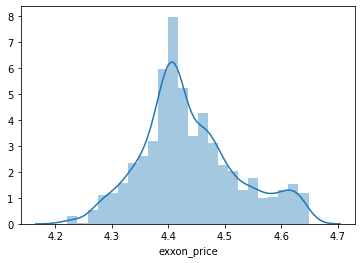

In [26]:
log_resp = np.log(resp)
sns.distplot(log_resp)

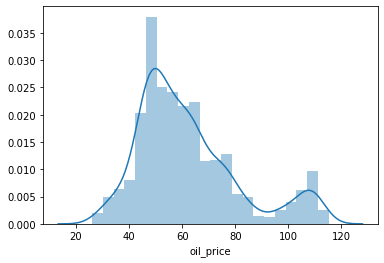

In [27]:
sns.distplot(X)

# IV - Building the Linear Regression Model 
 
 * Split assigned X & Y variables
 * Creating and Fitting the Regression Model
 * Predictions 


From the sklearn.model_selection import train_test_split, let's split the data 

In [28]:
y = df.drop('oil_price', axis = 1)
x = df[['oil_price']]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = .3, random_state = 1)

In [29]:
regres_model = LinearRegression()

regres_model.fit(X_train, Y_train)

LinearRegression()

## Y = mx + b (coefficient, intercept)

In [30]:

intercept = regres_model.intercept_[0]
coefficient = regres_model.coef_[0][0]


print("The Coefficient (slope) for our model is {:.2}".format(coefficient))
print("The Y intercept for linear model is {:.4}".format(intercept))

The Coefficient (slope) for our model is 0.24
The Y intercept for linear model is 70.01


Looking at this output - The slope of the best-fit line tells us how the dependent variable (y, exxon price) changes for every one unit increase in the independent (x, oil price) variable, on average

y = .24x + 70

### Predictions 

In [31]:
predictions = regres_model.predict(X_test)
predictions[:10]

array([[82.23530255],
       [82.87451027],
       [81.4824579 ],
       [78.925627  ],
       [84.013247  ],
       [93.13971285],
       [83.66760134],
       [93.94937596],
       [84.24288829],
       [84.24288829]])

## Rebuilding our Model with Statsmodel.api

After you fit the model, unlike with statsmodels, SKLearn does not automatically print the concepts or have a method like summary. So we have to print the coefficients separately - so the main benefit of statsmodels is the other statistics it provides

https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html

In [32]:
X = sm.add_constant(X)
 
#Swap of X , Y & Fit data

model = sm.OLS(Y, X).fit()

#statistical output

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          1.42e-123
Time:                        23:13:14   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

In [34]:
X 

,const,oil_price
date,,
2014-03-28,1.0,106.64
2014-03-31,1.0,105.95
2014-04-01,1.0,105.70
2014-04-02,1.0,103.37
2014-04-03,1.0,104.88
...,...,...
2019-03-19,1.0,67.13
2019-03-20,1.0,68.35
2019-03-21,1.0,68.30


In [35]:
print(model.t_test([1,0]))
print(model.t_test([0,1]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            70.4670      0.565    124.678      0.000      69.358      71.576
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.2315      0.009     26.565      0.000       0.214       0.249


In [36]:
model.pvalues

const         0.000000e+00
oil_price    1.423518e-123
dtype: float64

From the data above, if our p-value is <.05, then that variable is statistically significant

This is valid and so we can reject the null hypothesis and state that there is a relationship between oil and the price of Exxon.


# V - Reviewing Regression Assumptions 


* Data Linear?
* Multicollinearity?
* autocorrelation?
* Residuals are normally distributed 
* Sum & Mean of errors are zero 
* Homoscedasticity?



 - Data Linear? Yes, we found that out at Step III (we would have not proceeded with a Linear Model had it been non-linear)
 


 - Multicollinearity? This refers to when we have more than two explanatory/independent variables (x) but with this simple regression, we only have one 
 
 

 - Autocorrelation? Occurs when the realtionship between two variables are in different points of time are correlated and thus seek a certain pattern or trend

 - Homoscedasticity? This occurs when the variance of the error term in a regresion model is constant - if this is violated, then this causes bias in our data output, making it less precise - see below ->
 
 #### Let's start by displaying our residuals to see if they are normally distributed & if the mean of the residuals is equal to zero or close enough

## Residuals

Text(0, 0.5, 'Count')

<Figure size 576x432 with 0 Axes>

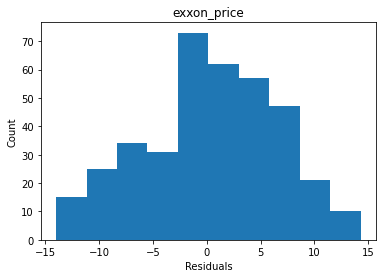

In [44]:
plt.figure(figsize=(8,6))
(Y_test - predictions).hist(grid = False)
plt.xlabel('Residuals')
plt.ylabel('Count')

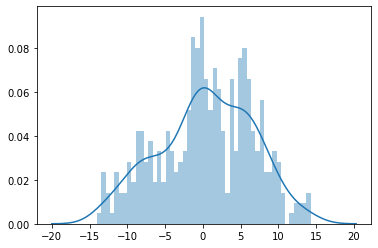

In [37]:
sns.distplot((Y_test-predictions),bins=50);

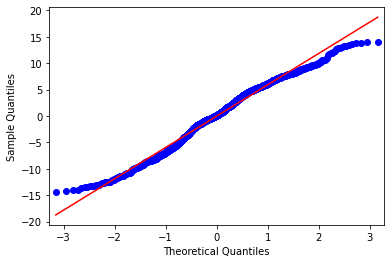

The mean of the residuals is -1.118e-14


In [38]:
# check for the normality of the residuals

import pylab

sm.qqplot(model.resid, line='s')
pylab.show()

mean_residuals = sum(model.resid)/ len(model.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

# Model Performance

* MSE: the average of the squares of the errors
* MAE: the mean of the absolute value of the errors
* RMSE: the square root of the mean of the squared errors

In [39]:
from sklearn import metrics

print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MSE: 38.435509767614796
MAE: 5.026548894988179
RMSE: 6.199637873909636


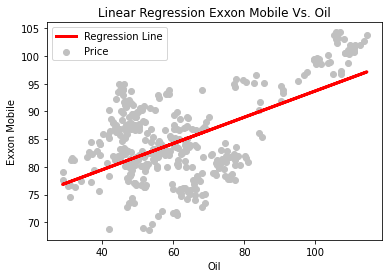

In [40]:
plt.scatter(X_test, Y_test,  color='silver', label = 'Price')
plt.plot(X_test, predictions, color='red', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Linear Regression Exxon Mobile Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()